In [47]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [48]:
# Linear Regression

In [49]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X = torch.tensor(X_numpy.astype(np.float32))
y = torch.tensor(y_numpy.astype(np.float32))
y = y.view(-1, 1)

n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [50]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

In [51]:
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
num_epochs = 100

for epoch in range(num_epochs):
    # froward pass and loss
    y_pred = model(X)
    loss = criterion(y, y_pred)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 389.3336
epoch: 20, loss = 314.7135
epoch: 30, loss = 312.3005
epoch: 40, loss = 312.2198
epoch: 50, loss = 312.2171
epoch: 60, loss = 312.2170
epoch: 70, loss = 312.2170
epoch: 80, loss = 312.2170
epoch: 90, loss = 312.2170
epoch: 100, loss = 312.2170


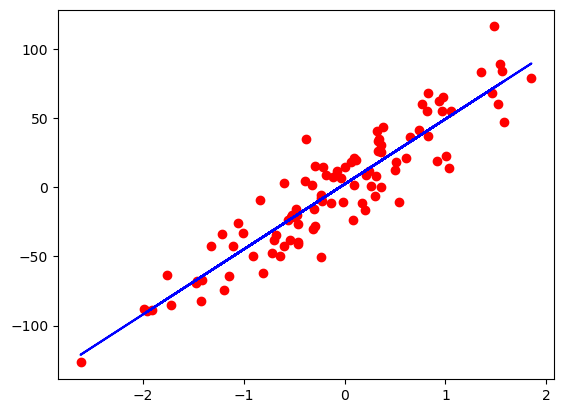

In [53]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [54]:
# Logisitc Regression